In [31]:
import pandas as pd
import numpy as np
from pycox.datasets import support
from sksurv import nonparametric
from lifelines import KaplanMeierFitter, CoxPHFitter
import matplotlib.pyplot as plt

# Tutorial
1. https://medium.com/the-researchers-guide/survival-analysis-in-python-km-estimate-cox-ph-and-aft-model-5533843c5d5d

# Data summary

**Name:** FakeSepsis

There are $2,164$ patients in this dataset (denoted by PatientID 0-2163), each measured at $20$ timepoints. Therefore, there are $43,280$ observations, each with $46$ covariates. Interestingly, age is not a monotonically increasing function of a timepoint (e.g., for Patient 0, Age at timepoint $0$ > Age at timepoint $1$). 

**Name:** support (see: https://bmcmedresmethodol.biomedcentral.com/articles/10.1186/s12874-018-0482-1)

The Study to Understand Prognoses Preferences Outcomes and Risks of Treatment (SUPPORT) is a larger study that researches the survival time of seriously ill hospitalized adults [28]. The dataset consists of 9,105 patients and 14 features for which almost all patients have observed entries (age, sex, race, number of comorbidities, presence of diabetes, presence of dementia, presence of cancer, mean arterial blood pressure, heart rate, respiration rate, temperature, white blood cell count, serum’s sodium, and serum’s creatinine). 


In [2]:
df = pd.read_csv("C001_FakeSepsis.csv").drop(columns = ["Unnamed: 0"])

In [11]:
dfs = support.read_df()
rename = {"x0": "Age", "x1":"race", "x2":"num_comorb", 
          "x3":"diab","x4":"dementia",
         "x5": "cancer","x6":"mean_arterial_bp", "x7":"hr",
         "x8":"resp", "x9":"temp", "x10":"serum_na", "x11":"wbc",
          "x12":"serum_creat", "x13":"rbc"}
dfs = dfs.rename(columns = rename)
# NOTE: event denotes whether an individual is right-censored. E=1 denotes fully observed; E=0 denotes censored.
dfs["event"] = dfs["event"].map({1:True,0:False})

In [26]:
dfs1 = dfs[dfs["Age"] < 30]
dfs2 = dfs[dfs["Age"].between(30,50)]
dfs3 = dfs[dfs["Age"].between(50,70)]
dfs4 = dfs[dfs["Age"] > 70]

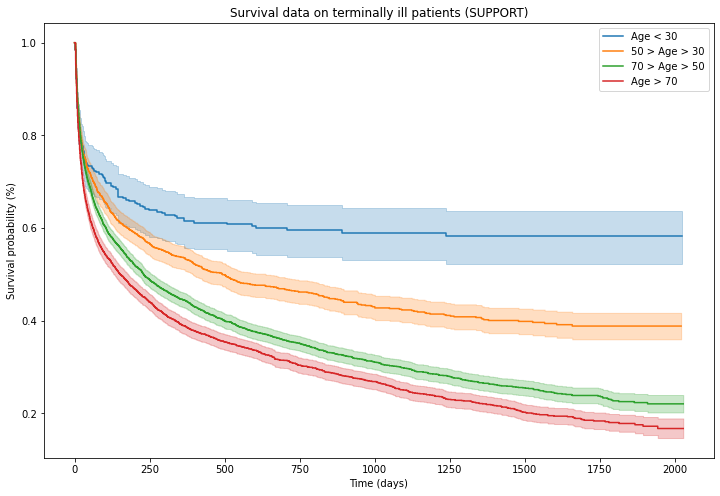

In [70]:
km = KaplanMeierFitter() ## instantiate the class to create an object

## Fit the data into the model
km.fit(dfs1["duration"], dfs1["event"], label = "Age < 30")
km.plot(ci_show = True,  figsize = (12,8))
km.fit(dfs2["duration"], dfs2["event"], label = "50 > Age > 30")
km.plot(ci_show=True)
km.fit(dfs3["duration"], dfs3["event"], label = "70 > Age > 50")
km.plot(ci_show=True)
km.fit(dfs4["duration"], dfs4["event"], label = "Age > 70")
km.plot(ci_show=True)
plt.title('Survival data on terminally ill patients (SUPPORT)')
plt.ylabel('Survival probability (%)')
plt.xlabel('Time (days)')
plt.savefig("km")

In [33]:
cph = CoxPHFitter()
cph.fit(dfs, duration_col = 'duration', event_col = 'event')
cph.print_summary()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/lifelines/utils/printer.py:62: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  return summary_df[columns].to_latex(float_format="%." + str(self.decimals) + "f")


<lifelines.CoxPHFitter: fitted with 8873 total observations, 2837 right-censored observations>
             duration col = 'duration'
                event col = 'event'
      baseline estimation = breslow
   number of observations = 8873
number of events observed = 6036
   partial log-likelihood = -51338.66
         time fit was run = 2022-05-27 14:51:50 UTC

---
                   coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                
Age                0.01       1.01       0.00             0.01             0.02                 1.01                 1.02
race              -0.08       0.92       0.03            -0.14            -0.03                 0.87                 0.97
num_comorb         0.04       1.04       0.01             0.02             0.06                 1.02                 1.06
diab               0.02       1.02       0.02            -0.02             0.06                 0.98                 1.06
dementia          -0.07       0.94       0.04            -0.13             0.00                 0.87                 1.00
cancer             0.17       1.19       0.07             0.03             0.31                 1.03                 1.36
mean_arterial_bp  -0.28       0.76       0.02            -0.33            -0.23                 0.72                 0.79
hr                -0.00       1.00       0.00            -0.00            -0.00                 1.00                 1.00
resp               0.00       1.00       0.00             0.00             0.00                 1.00                 1.00
temp               0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
serum_na           0.00       1.00       0.01            -0.02             0.03                 0.98                 1.03
wbc               -0.00       1.00       0.00            -0.01             0.00                 0.99                 1.00
serum_creat        0.00       1.00       0.00             0.00             0.01                 1.00                 1.01
rbc                0.03       1.03       0.01             0.02             0.05                 1.02                 1.05

                   cmp to      z      p   -log2(p)
covariate                                         
Age                  0.00  15.47 <0.005     176.97
race                 0.00  -3.22 <0.005       9.61
num_comorb           0.00   3.46 <0.005      10.84
diab                 0.00   0.85   0.40       1.33
dementia             0.00  -1.84   0.07       3.94
cancer               0.00   2.45   0.01       6.12
mean_arterial_bp     0.00 -11.26 <0.005      95.27
hr                   0.00  -5.82 <0.005      27.31
resp                 0.00   5.35 <0.005      23.47
temp                 0.00   1.36   0.17       2.52
serum_na             0.00   0.28   0.78       0.35
wbc                  0.00  -0.96   0.34       1.57
serum_creat          0.00   2.20   0.03       5.18
rbc                  0.00   4.56 <0.005      17.57
---
Concordance = 0.57
Partial AIC = 102705.31
log-likelihood ratio test = 478.43 on 14 df
-log2(p) of ll-ratio test = 307.16

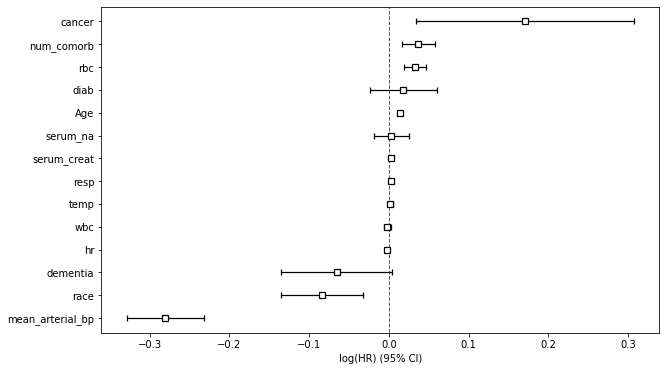

In [76]:
plt.subplots(figsize = (10, 6))
cph.plot()
plt.savefig("cph-var")

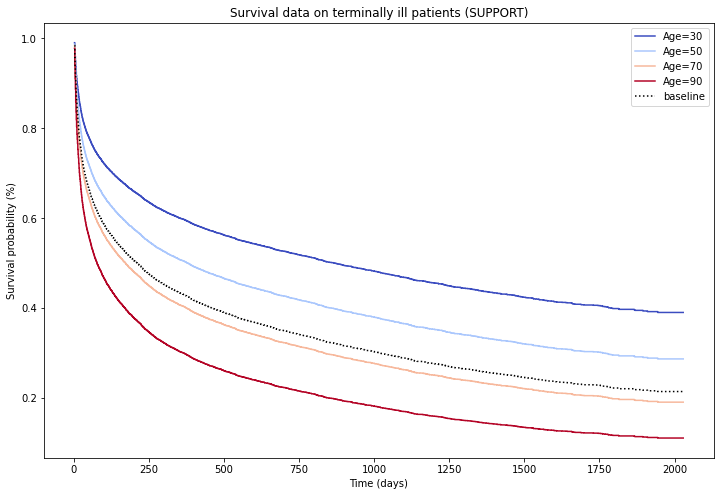

In [77]:
cph.plot_partial_effects_on_outcome(covariates = 'Age', values = [30, 50, 70, 90], figsize = (12,8),
                                    cmap = 'coolwarm')
plt.title('Survival data on terminally ill patients (SUPPORT)')
plt.ylabel('Survival probability (%)')
plt.xlabel('Time (days)')
plt.savefig("cph-age.png")

In [50]:
dfs[dfs["event"] == True]

,Age,race,num_comorb,diab,dementia,cancer,mean_arterial_bp,hr,resp,temp,serum_na,wbc,serum_creat,rbc,duration,event
0,82.709961,1.0,2.0,1.0,0.0,0.0,0.0,160.0,55.0,16.0,38.195309,142.0,19.000000,1.099854,30.0,True
2,23.399990,1.0,2.0,3.0,0.0,0.0,1.0,87.0,144.0,45.0,37.296879,130.0,5.199219,1.199951,96.0,True
4,71.794983,0.0,1.0,1.0,0.0,0.0,0.0,65.0,135.0,40.0,38.593750,146.0,0.099991,0.399963,7.0,True
5,49.932980,0.0,1.0,1.0,0.0,0.0,0.0,70.0,105.0,33.0,38.195309,127.0,5.299805,1.199951,50.0,True
8,81.031982,1.0,2.0,2.0,0.0,0.0,2.0,42.0,102.0,10.0,36.000000,137.0,20.398438,2.099609,19.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8867,77.650940,0.0,2.0,1.0,0.0,1.0,1.0,71.0,63.0,8.0,37.796879,139.0,9.398438,2.799805,26.0,True
8868,81.064941,0.0,4.0,1.0,0.0,0.0,1.0,111.0,110.0,34.0,39.593750,135.0,13.000000,1.500000,36.0,True
8869,72.560966,0.0,2.0,1.0,0.0,0.0,1.0,53.0,74.0,28.0,34.695309,139.0,7.899414,1.899902,49.0,True
8870,63.228001,0.0,1.0,1.0,0.0,0.0,2.0,95.0,110.0,22.0,38.695309,132.0,7.799805,1.500000,6.0,True


In [67]:
temp = dfs[dfs["duration"] < 1000]
temp = temp[temp["event"] == False]

In [68]:
temp

,Age,race,num_comorb,diab,dementia,cancer,mean_arterial_bp,hr,resp,temp,serum_na,wbc,serum_creat,rbc,duration,event
3,53.075989,1.0,4.0,3.0,0.0,0.0,0.0,55.0,100.0,18.0,36.000000,135.0,8.699219,0.799927,892.0,False
6,62.942989,0.0,5.0,2.0,1.0,0.0,1.0,116.0,130.0,35.0,38.195309,133.0,14.099609,0.799927,381.0,False
11,51.090969,0.0,1.0,1.0,0.0,0.0,1.0,58.0,95.0,9.0,35.898441,128.0,22.097656,1.399902,940.0,False
18,69.748962,1.0,2.0,1.0,0.0,0.0,1.0,120.0,106.0,40.0,38.093750,135.0,27.699219,10.298828,988.0,False
19,57.505981,1.0,0.0,1.0,0.0,0.0,1.0,118.0,125.0,9.0,38.296879,140.0,7.099609,0.899902,512.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8855,55.618992,0.0,4.0,1.0,1.0,0.0,2.0,120.0,60.0,26.0,36.195309,144.0,5.299805,1.000000,637.0,False
8859,73.398987,0.0,2.0,1.0,0.0,0.0,1.0,123.0,128.0,12.0,35.593750,145.0,7.500000,1.799805,389.0,False
8864,47.785980,0.0,2.0,1.0,1.0,0.0,1.0,83.0,72.0,24.0,35.500000,148.0,16.500000,1.199951,608.0,False
8866,37.026981,0.0,1.0,1.0,0.0,0.0,1.0,65.0,131.0,52.0,38.593750,150.0,12.000000,1.899902,766.0,False


In [75]:
dfs[dfs["Age"] > 70]

,Age,race,num_comorb,diab,dementia,cancer,mean_arterial_bp,hr,resp,temp,serum_na,wbc,serum_creat,rbc,duration,event
0,82.709961,1.0,2.0,1.0,0.0,0.0,0.0,160.0,55.0,16.0,38.195309,142.0,19.000000,1.099854,30.0,True
1,79.660950,1.0,0.0,1.0,0.0,0.0,1.0,54.0,67.0,16.0,38.000000,142.0,10.000000,0.899902,1527.0,False
4,71.794983,0.0,1.0,1.0,0.0,0.0,0.0,65.0,135.0,40.0,38.593750,146.0,0.099991,0.399963,7.0,True
7,71.457947,1.0,4.0,1.0,0.0,0.0,2.0,68.0,102.0,24.0,35.500000,134.0,9.199219,1.399902,1530.0,False
8,81.031982,1.0,2.0,2.0,0.0,0.0,2.0,42.0,102.0,10.0,36.000000,137.0,20.398438,2.099609,19.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8863,77.658997,0.0,2.0,1.0,0.0,0.0,2.0,100.0,64.0,25.0,36.398441,146.0,18.296875,3.899902,56.0,True
8867,77.650940,0.0,2.0,1.0,0.0,1.0,1.0,71.0,63.0,8.0,37.796879,139.0,9.398438,2.799805,26.0,True
8868,81.064941,0.0,4.0,1.0,0.0,0.0,1.0,111.0,110.0,34.0,39.593750,135.0,13.000000,1.500000,36.0,True
8869,72.560966,0.0,2.0,1.0,0.0,0.0,1.0,53.0,74.0,28.0,34.695309,139.0,7.899414,1.899902,49.0,True
